# 21장 그리디 알고리즘

> 그리디 알고리즘은 글로벌 최적을 찾기 위해 각 단계에서 로컬 최적의 선택을 하는 휴리스틱 문제 해결 알고리즘입니다.

그리디 알고리즘이란 바로 눈앞의 이익만을 쫓는 알고리즘을 말합니다.

대부분의 경우 뛰어난 결과를 도출하지 못하지만, 드물게 최적해를 보장하는 경우도 있습니다. 그리디 알고리즘은 최적화 문제를 대상으로 합니다. 최적해를 찾을 수 있으면 그것을 목표로 삼고, 찾기 어려운 경우에는 주저진 시간 내에 그런대로 괜찮은 해를 찾는 것을 목표로 삼습니다.

따라서 그리디 라는 단어는 이 알고리즘의 원리에 어울리는 단어라고 볼 수 있습니다.

그리디 알고리즘이 잘 작동하는 문제들은 탐욕 선택 (Greedy Choice Property)을 갖고 있는 최적 부분 구조 (Optimal Substructure)인 문제들입니다.

여기서 탐욕 선택 속성이란 앞의 선택이 이후 선택에 영향을 주지 않는 것을 말합니다.

다시 말해서 그리디 알고리즘은 선택을 고려하지 않습니다. 또한 최적 부분 구조란 문제의 최적 해결 방법이 부분 문제에 대한 최적 해결 방법으로 구성되는 경우를 말합니다.

이렇게 탐욕 선택 속성과 최적 부분 구조의 2가지 조건을 만족하면 최적해를 찾을 수 있다. 하지만 그렇지 않더라도 그리디 알고리즘은 정답을 근사하게 찾는 용도로 활용 할 수 있으며, 대부분의 경우 계산 속도가 빠르므로 매우 실용적입니다.

### 78. 주식을 사고팔기 가장 좋은 시점 2

여러 번의 거래로 낼 수 있는 최대 이익을 산출하라.

- input : [7, 1, 5, 3, 6, 4]
- output : 7
- 설명 : 1일 때 사서 5일 때 팔아 4의 이익을 얻고, 3일 때 사서 6일 때 팔아 3의 이익을 얻는다. 둘을 합하면 7이 된다.

### 풀이 1. 그리디 알고리즘

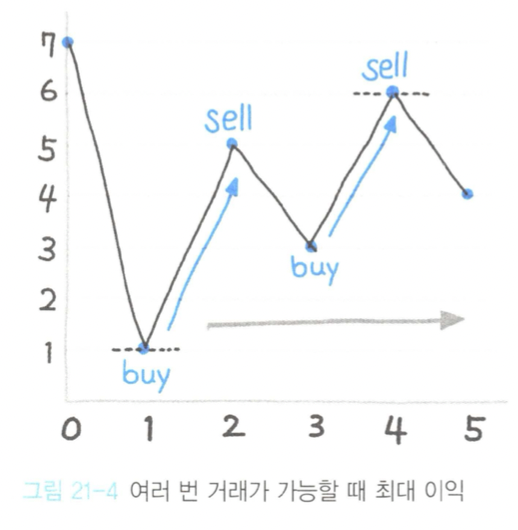

In [6]:
def maxProfit1(self, prices):
    result = 0

    # 값이 오르는 경우 매번 그리디 계산
    for i in range(len(prices) -1):
        if prices[i + 1] > prices[i]:
            result += prices[i + 1] - prices[i]

    return result

In [7]:
prices = [7, 1, 5, 3, 6, 4]

In [8]:
maxProfit1(None, prices)

7

### 풀이 2. 파이썬 다운 방식

In [10]:
def maxProfit2(self, prices):
    # 0보다 크면 무조건 합산
      return sum(max(prices[i + 1] - prices[i],0) for i in range(len(prices) -1))

In [11]:
maxProfit2(None, prices)

7

### 79. 키에 따른 대기열 재구성

여러 명의 사람들이 줄을 서 있다. 각각의 사람은 (h, k)의 두 정수 쌍을 갖는데, h는 그 사람의 키, k는 앞에 줄 서 있는 사람들 중 자신의 키 이상인 사람들의 수를 뜨합니다. 이 값이 올바르도록 줄을 재정렬하는 알고리즘을 작성하라.

- input = [[7,0], [4,4], [7,1], [5,0], [6,1], [5,2]]
- output = [[5,0], [7,0], [5,2], [6,1], [4,4], [7,1]]

- 설명 : 키가 5인 사람이 가장 먼저 섰고, 앞에는 아무도 없다. 7인 사람이 뒤 따르고, 그보다 키가 더 큰 사람은 아무도 없다. 5인 사람이 섰으며, 앞에 5, 7 두 명이 자신보다 크거나 같다. 6인 사람의 앞에는 자신보다 큰 키 7인 사람 한 명이 있다. 4인 사람 앞에는 5, 7, 5, 6 네 명이 있다. 마지막으로 7인 사람 앞에 자신보다 크거나 같은 이는 키가 7인 사람 1명이다.

### 풀이 1. 우선순위 큐 이용

In [16]:
import heapq

def reconstructQueue(self, people):
    heap = []

    # 키 역순, 인덱스 삽입
    for person in people:
        heapq.heappush(heap, (-person[0], person[1]))

    result = []

    # 키 역순, 인덱스 추출
    while heap:
        person = heapq.heappop(heap)
        result.insert(person[1], [-person[0], person[1]])

    return result

In [17]:
people = [[7,0], [4,4], [7,1], [5,0], [6,1], [5,2]]

In [18]:
reconstructQueue(None, people)

[[5, 0], [7, 0], [5, 2], [6, 1], [4, 4], [7, 1]]

### 80. 태스크 스케줄러

A 에서 Z로 표현된 태스크가 있습니다. 각 간격마다 CPU는 한 번의 태스크만 실행할 수 있고, n번의 간격 내에는 동일한 태스크를 실행할 수 없습니다. 더 이상 태스크를 실행할 수 없는 경우 아이들 (idle) 상태가 됩니다. 모든 태스크를 실행하기 위한 최소 간격을 출력하라.

- input : tasks = ["A", "A", "A", "B", "B", "B"], n = 2
- output : 8
- 설명 : A -> B -> idle -> A -> B -> idle -> A -> B

### 풀이 1. 우선순위 큐 이용

In [20]:
import collections

def leastInterval(self, tasks, n):
    counter = collections.Counter(tasks)
    result = 0

    while True:
        sub_count = 0
        # 개수 순 추출
        for task, _ in counter.most_common(n + 1):
            sub_count += 1
            result += 1

            counter.subtract(task)
            # 0 이하인 아이템을 목록에서 완전히 제거
            counter += collections.Counter()

        if not counter:
            break

        result += n - sub_count + 1

    return result


In [21]:
tasks = ["A", "A", "A", "B", "B", "B"]
n = 2

In [22]:
leastInterval(None, tasks, n)

8

### 81.주유소

원형으로 경로가 연결된 주유소 목록이 있습니다. 각 주유소는 gas [i] 만큼의 기름을 갖고 있으며, 다음 주유소로 이동하는데 cost [i]가 필요합니다. 기름이 부족하면 이동할 수 없다고 할 때 모든 주유소를 방문할 수 있는 출발점의 인덱스를 출력하세요.

출발점이 존재하지 않을 경우 -1을 리턴하며, 출발점은 유일하다.

In [23]:
gas = [1, 2, 3, 4, 5]
cost = [3, 4, 5, 1, 2]

- 설명

3번 인덱스 (기름을 4번 충전할 수 있는)에서 출발할 경우는 다음과 같습니다.

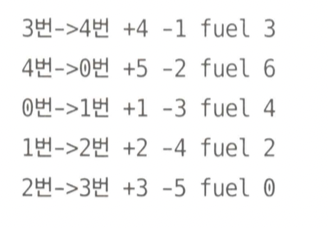

정확하게 기름이 0까지 소모되며, 모든 주유소를 방문 할 수 있습니다.

### 풀이 1. 모두 방문

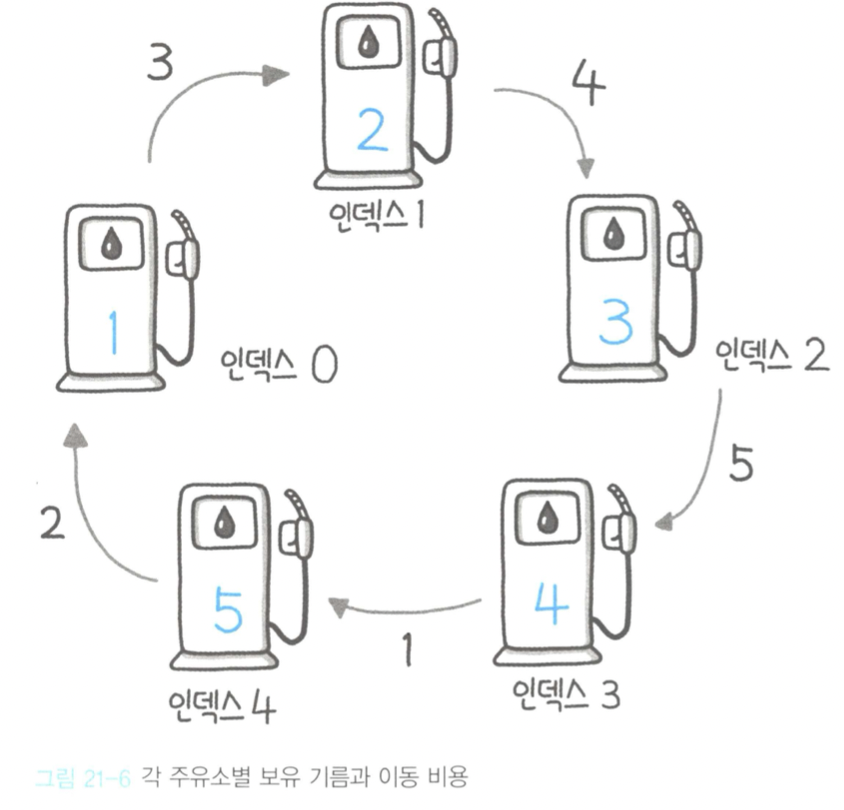

In [25]:
def canCompleteCircuit1(self, gas, cost):
    for start in range(len(gas)):
        fuel = 0
        for i in range(start, len(gas) + start):
            index = i % len(gas)

            can_travel = True
            if gas[index] + fuel < cost[index]:
                can_travel = False
                break
            else:
                fuel += gas[index] - cost[index]
        if can_travel:
            return start
    return -1

In [26]:
canCompleteCircuit1(None, gas, cost)

3

### 풀이 2. 한 번 방문

In [28]:
def canCompleteCircuit2(self, gas, cost):
    # 모든 주유소 방문 가능 여부 판별
    if sum(gas) < sum(cost):
        return -1

    start, fuel = 0, 0
    for i in range(len(gas)):
        # 출발점이 안되는 지점 판별
        if gas[i] + fuel < cost[i]:
            start = i + 1
            fuel = 0
        else:
            fuel += gas[i] - cost[i]
    return start

In [29]:
canCompleteCircuit2(None, gas, cost)

3

### 82. 쿠키 부여

아이들에게 1개씩 쿠키를 나눠줘야 합니다. 각 아이 child_i 마다 그리트 팩터 (Greed Factor) g_i 를 갖고 있으며, 이는 아이가 만족하는 최소 쿠키의 크기를 말합니다. 각 쿠키 cookie_j는 크기 s_j를 갖고 있으며, s_j >= g_i 이어야 아이가 만족하며 쿠키를 받습니다. 최대 몇 명의 아이들에게 쿠키를 줄 수 있는 지 출력하시오.

- input 1 : [1, 2, 3], [1, 1]
- output 1 : 1
- 설명 : 두 번째 아이부터는 크기 2 이상의 쿠키가 필요하지만, 갖고 있는 최대 크기는 1이기 때문에 1명의 아이에게만 줄 수 있습니다.

- input 2 : [1, 2], [1, 2, 3]
- output 2 : 2
- 설명 : 충분한 쿠기를 갖고 있으며, 2명 모두에게 쿠키를 줄 수 있습니다.

### 풀이 1. 그리디 알고리즘

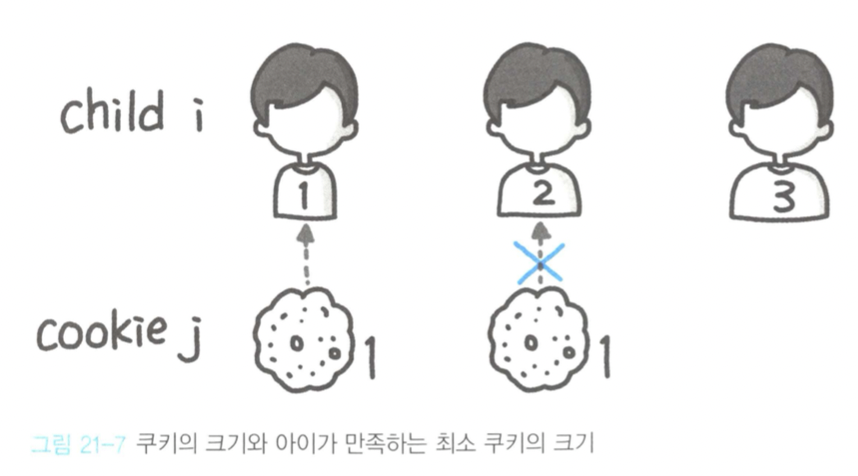

위 그림에서 2번째 아이는 크기 2 이상의 쿠키를 원하지만, 2번째 쿠키도 크기가 1이기 때문에 줄 수 없습니다. 따라서 여기에서의 출력은 1이 됩니다.

In [30]:
def findContentChildren1(self, g, s):
    g.sort()
    s.sort()

    child_i = cookie_j = 0

    # 만족하지 못할 때까지 그리디 진행
    while child_i < len(g) and cookie_j < len(s):
        if s[cookie_j] >= g[child_i]:
            child_i += 1
        cookie_j += 1

    return child_i

In [32]:
g1 = [1, 2, 3]
s1 = [1, 1]

In [33]:
findContentChildren1(None, g1, s1)

1

### 풀이 2. 이진 검색

2개의 리스트를 모두 번갈아가며 탐색하는 게 아니라 하나의 리스트를 순회하면서 다른 하나는 이진 검색으로 찾습니다.

그런 다음 찾아낸 인덱스가 현재 부여한 아이들보다 클 경우에는 이 경우 더 줄 수 있다는 말이 되므로, 줄 수 있는 아이들의 수를 1명 더 늘려줍니다.

In [35]:
import bisect

def findContentChildren2(self, g, s):
    g.sort()
    s.sort()

    result = 0

    for i in s:
        # 이진 검색으로 더 큰 인덱스 탐색
        index = bisect.bisect_right(g, i)
        if index > result:
            result += 1

    return result

In [36]:
g2 = [1, 2]
s2 = [1, 2, 3]

In [38]:
findContentChildren2(None, g2, s2)

2